#### Imports

In [29]:
## importar as bibliotecas básicas

import numpy as np
import pandas as pd
import random

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
    
## plot style and warnings    
plt.style.use('ggplot')
from IPython.display import display # Allows the use of display() for DataFrames
import warnings
warnings.filterwarnings('ignore')

### Abertura da Base de Dados

In [30]:
df = pd.read_csv("atpplayers.csv")

# **Estatísticas Descritivas**

### Dimensão da base de dados

In [5]:
df.shape

(1308835, 15)

Existem 1308835 registos associados a 15 colunas.

### Informações sobre a base de dados (nomes das variáveis e tipos das variáveis)

Só existe uma variável quantitativa (Height), apesar de ser percetível que existem outras variáveis que são numéricas como : 

- Prize;
- GameRank

In [6]:
print(df.dtypes)

PlayerName     object
Born           object
Height        float64
Hand           object
LinkPlayer     object
Tournament     object
Location       object
Date           object
Ground         object
Prize          object
GameRound      object
GameRank       object
Oponent        object
WL             object
Score          object
dtype: object


In [7]:
df.columns

Index(['PlayerName', 'Born', 'Height', 'Hand', 'LinkPlayer', 'Tournament',
       'Location', 'Date', 'Ground', 'Prize', 'GameRound', 'GameRank',
       'Oponent', 'WL', 'Score'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308835 entries, 0 to 1308834
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   PlayerName  1308835 non-null  object 
 1   Born        988083 non-null   object 
 2   Height      982658 non-null   float64
 3   Hand        1116918 non-null  object 
 4   LinkPlayer  1308835 non-null  object 
 5   Tournament  1308835 non-null  object 
 6   Location    1308835 non-null  object 
 7   Date        1308835 non-null  object 
 8   Ground      1308644 non-null  object 
 9   Prize       1289699 non-null  object 
 10  GameRound   1308835 non-null  object 
 11  GameRank    1289599 non-null  object 
 12  Oponent     1308828 non-null  object 
 13  WL          1289578 non-null  object 
 14  Score       1289435 non-null  object 
dtypes: float64(1), object(14)
memory usage: 149.8+ MB


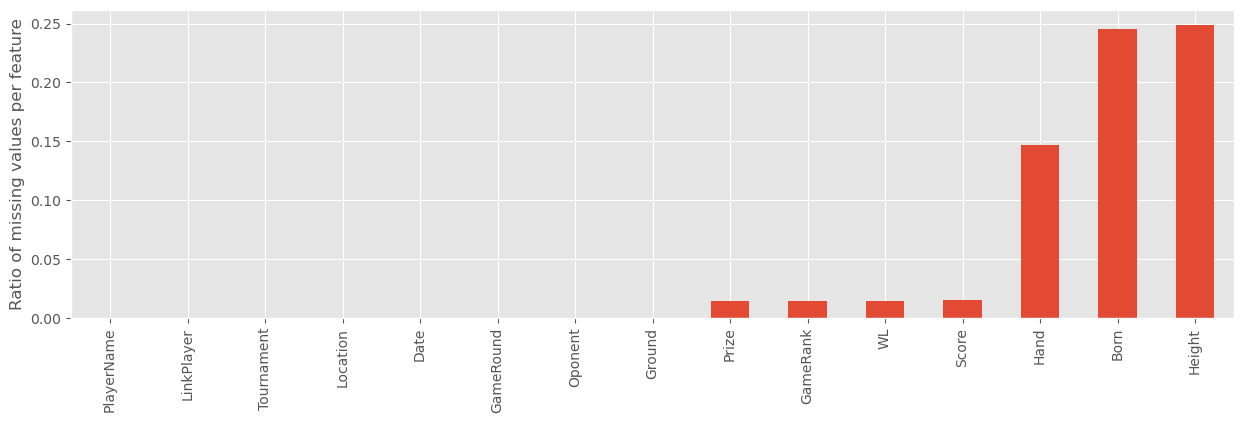

In [31]:
df.isna().mean().sort_values().plot(kind="bar", figsize=(15, 4),
title="",ylabel="Ratio of missing values per feature");

É percetível que as seguintes variáveis tem valores omissos:

- Born;
- Height;
- Hand;
- Prize;
- GameRank;
- Oponent;
- WL;
- Score.

#### Função Describe

A função describe só se usa para variáveis numéricas, como foi dito acima, neste momento só existe uma variável (Height), portanto, é normal que o describe só se aplique uma vez.

In [9]:
df.describe()

,Height
count,982658.000000
mean,181.248822
std,24.956836
min,0.000000
25%,180.000000
50%,183.000000
75%,188.000000
max,510.000000


Nota: Existem outliers nesta variável uma vez que, o máximo desta variável é 510 (altura medida em centímetros) e como é obvio, não existe uma pessoa no mundo que meça 510 cm.

### Valores únicos

Antes de ser feito algum tipo de tratamento na variável 'Location', vamos conhecer um pouco da variável e obser quantos valores únicos é que apresenta.

In [12]:
print(df["Location"].unique())

count = 0
for x in df["Location"].unique():
    count= count+1
print('Temos ' + str(count) + ' valores únicos na variável Location')

['Dubai, U.A.E.' 'Madrid, Spain' 'New York, NY, U.S.A.' ...
 'Columbia, SC, U.S.A.' 'Reinach, Switzerland' 'Lakeway, TX, U.S.A.']
Temos 2512 valores únicos na variável Location


## *Splits*

Em baixo, realizaremos a função split que permitirá ir buscar o último valor da coluna Location, que predominantemente será o nome do país.

Também criamos uma nova coluna, last_word_location, onde vamos guardar essa variável.

In [4]:
df['last_word_location'] = df['Location'].str.split().str[-1]

In [5]:
df['last_word_location'].unique()

array(['U.A.E.', 'Spain', 'U.S.A.', 'France', 'Japan', 'Britain', 'Italy',
       'Serbia', 'Monaco', 'Australia', 'Austria', 'China', 'Qatar',
       'Canada', 'Mexico', 'Brazil', 'States', 'Belgium', 'Switzerland',
       'Croatia', 'Netherlands', 'Germany', 'Thailand', 'Republic',
       'Russia', 'Portugal', 'Israel', 'Scotland', 'England', 'SCG', 'M',
       'Finland', 'Romania', 'Hungary', 'Montenegro', 'Bulgaria', 'India',
       'Slovakia', 'Slovenia', 'Kazakhstan', 'Taipei', 'Belarus',
       'Tunisia', 'Estonia', 'Georgia', 'Argentina', 'Denmark', 'Chile',
       'Sweden', 'Ita', 'Zealand', 'Poland', 'Czechoslovakia',
       'Yugoslavia', 'Barcelona', 'Morocco', 'Malaysia', 'Turkey',
       'Colombia', 'Panama', 'Doha', 'Marino', 'Philippines',
       'Guadeloupe', 'Caledonia', 'Greece', 'Cyprus', 'Uzbekistan',
       'Norway', 'USA', 'Ecuador', 'Uruguay', 'Peru', 'Latvia',
       'Luxembourg', 'Lithuania', 'Herzegovina', 'Korea', 'U.S.A',
       'Egypt', 'Vietnam', 'Paraguay

In [10]:
print('Existem ' + str(df['last_word_location'].eq('China').sum()) + ' jogos realizados na China')

Existem 23224 jogos realizados na China


In [11]:
print('Existem ' + str(df['last_word_location'].eq('Taipei').sum() + df['last_word_location'].eq('Taip').sum()) + ' jogos realizados na China')

Existem 3133 jogos realizados na China


A China tem os valores limpos. 

Outro ponto importante, vai ser a transformação do Taiwan (que na base de dados, está denominado como Taip e Taipei) em China.

In [15]:
df.loc[df['last_word_location'] == 'Taipei', 'last_word_location'] = 'China'
df.loc[df['last_word_location'] == 'Taip', 'last_word_location'] = 'China'

Em baixo, vamos perceber quantos registos temos associados à China:

In [16]:
(df['last_word_location'] == 'China').sum()

26357

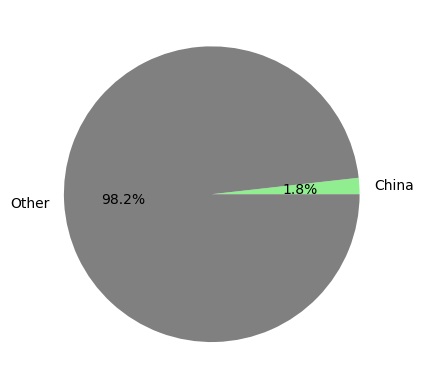

In [27]:
china_counts = (df['last_word_location'] == 'China').sum()
other_counts = len(df) - china_counts
labels = ['China', 'Other']
frequencies = [china_counts, other_counts]
colors = ['lightgreen', 'gray']
plt.pie(frequencies, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('')
plt.savefig('piechart_china.png')
plt.show()

Em baixo, vamos verificar novamente os valores únicos, para verificar se o Taiwan ainda está na lista de valores únicos.

In [17]:
df['last_word_location'].unique()

array(['U.A.E.', 'Spain', 'U.S.A.', 'France', 'Japan', 'Britain', 'Italy',
       'Serbia', 'Monaco', 'Australia', 'Austria', 'China', 'Qatar',
       'Canada', 'Mexico', 'Brazil', 'States', 'Belgium', 'Switzerland',
       'Croatia', 'Netherlands', 'Germany', 'Thailand', 'Republic',
       'Russia', 'Portugal', 'Israel', 'Scotland', 'England', 'SCG', 'M',
       'Finland', 'Romania', 'Hungary', 'Montenegro', 'Bulgaria', 'India',
       'Slovakia', 'Slovenia', 'Kazakhstan', 'Belarus', 'Tunisia',
       'Estonia', 'Georgia', 'Argentina', 'Denmark', 'Chile', 'Sweden',
       'Ita', 'Zealand', 'Poland', 'Czechoslovakia', 'Yugoslavia',
       'Barcelona', 'Morocco', 'Malaysia', 'Turkey', 'Colombia', 'Panama',
       'Doha', 'Marino', 'Philippines', 'Guadeloupe', 'Caledonia',
       'Greece', 'Cyprus', 'Uzbekistan', 'Norway', 'USA', 'Ecuador',
       'Uruguay', 'Peru', 'Latvia', 'Luxembourg', 'Lithuania',
       'Herzegovina', 'Korea', 'U.S.A', 'Egypt', 'Vietnam', 'Paraguay',
       'Bolivi

Em cima, podemos concluir que, nesta base de dados, o Taiwan foi transformado em China.

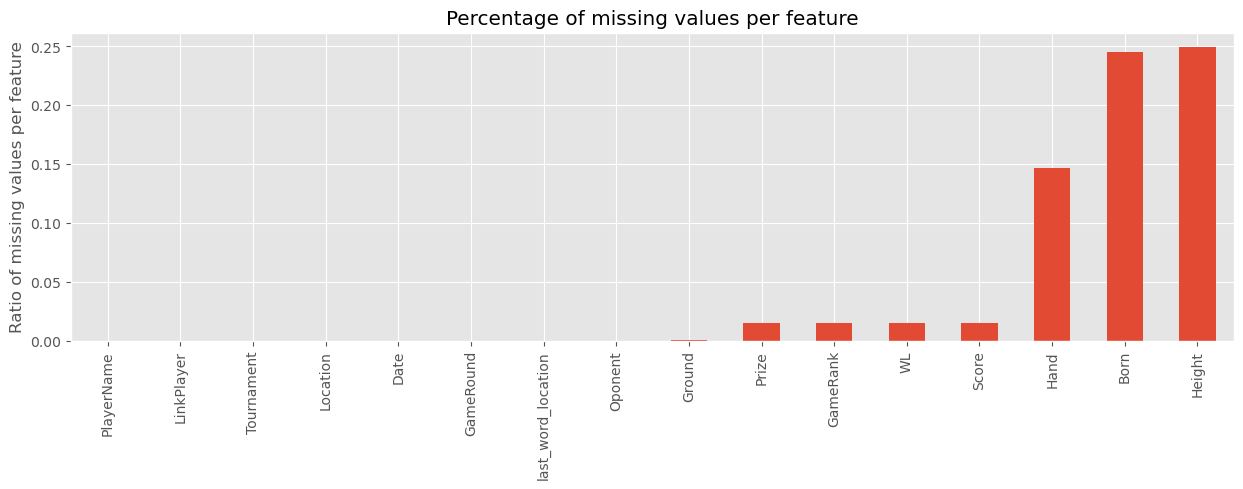

In [18]:
### gráfico de barras das colunas ordenadas em função de número de valores omissos (do menor ao maior)
## usamos a função .isna() - para detetar os valores omissos e a função .sort_values() - para ordenar as colunas/variáveis
df.isna().mean().sort_values().plot(kind="bar", figsize=(15, 4),
title="Percentage of missing values per feature",ylabel="Ratio of missing values per feature");

In [19]:
nan_count = df.isna().sum()
print(nan_count)

PlayerName                 0
Born                  320752
Height                326177
Hand                  191917
LinkPlayer                 0
Tournament                 0
Location                   0
Date                       0
Ground                   191
Prize                  19136
GameRound                  0
GameRank               19236
Oponent                    7
WL                     19257
Score                  19400
last_word_location         0
dtype: int64


## Criação de um novo DataFrame

Em baixo, vamos criar um novo data frame, um dataframe que contenha apenas os jogos que são jogados na China, uma vez que, não faz sentido, limpar os dados de todos os jogos que são jogados no mundo inteiro.

Então, vai ser criado, um df_clean, que vai buscar à coluna acima criada (last_word_location), apenas os que têm como China nessa variável.

In [20]:
df_clean = df.loc[df['last_word_location'] == 'China']

In [21]:
df_clean = df_clean.drop('Location', axis=1)

In [22]:
df_clean = df_clean.rename(columns={'last_word_location': 'Location'})

In [23]:
df_clean.columns #Verificação em que alteramos o nome da variável

Index(['PlayerName', 'Born', 'Height', 'Hand', 'LinkPlayer', 'Tournament',
       'Date', 'Ground', 'Prize', 'GameRound', 'GameRank', 'Oponent', 'WL',
       'Score', 'Location'],
      dtype='object')

Nota: vamos passar já o Df_clean para um CSV, para assim não termos que correr o código todo atrás.

In [24]:
df_clean.to_csv('atpchina.csv', index=False)